In [19]:
import numpy as np
import json
import torch
from InstructorEmbedding import INSTRUCTOR
from tqdm.notebook import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
device = torch.device("cuda")
embed_model = INSTRUCTOR("hkunlp/instructor-xl").to(device)
embed_model.max_seq_length = 4096

load INSTRUCTOR_Transformer
max_seq_length  512


In [4]:
with open("/workdir/unsupervised_pretrain/labels.json", "r") as f:
    data = json.load(f)

In [5]:
instruction = "Represent the geospatial data for retrieval; Input: "

In [10]:
pairs = []
for datum in data:
    pairs.append([instruction, datum])
embeddings = embed_model.encode(pairs)

In [14]:
normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

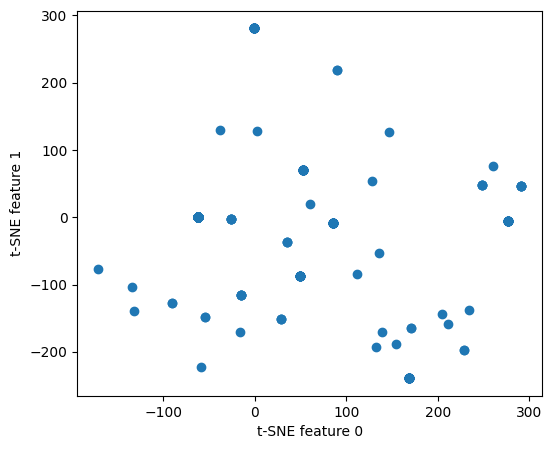

In [15]:
tsne = TSNE(n_components=2, random_state=0)

data_2d = tsne.fit_transform(normalized_embeddings)

# plot the result
plt.figure(figsize=(6, 5))
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

# Similarity/Retrieval #

In [20]:
def top_k_query_cosine(query_vector, data, k):
    cosine_similarities = cosine_similarity(data, query_vector.reshape(1, -1)).flatten()
    top_k_indices = np.argpartition(-cosine_similarities, k)[:k]
    return top_k_indices

In [16]:
query_instruction = "Represent the geospatial data for retrieving similar data; Input: "

In [45]:
query_embedding = embed_model.encode([[query_instruction, "Buildings: zero. Land use land cover: river"]])
query_embedding = query_embedding / np.linalg.norm(query_embedding, axis=1, keepdims=True)

In [46]:
top_k_query_cosine(query_embedding, embeddings, 5)

array([230, 146, 145, 204, 245])